## Submit job

In [1]:
from quri_parts_oqtopus.backend import OqtopusSseBackend
from src.adapter import QuriAdapter, collect_payloads_from_job

DEVICE = "anemone"
PROGRAM = "check_rabi"

backend = OqtopusSseBackend()

job = backend.run_sse(
    file_path=f"program/{DEVICE}/{PROGRAM}.py",
    device_id=f"{DEVICE}-pulse",
    name=PROGRAM,
)
print(f"job_id = {job.job_id}")

job.wait_for_completion()
print(f"job_status = {job.status}  elapsed={job.execution_time}")

adapter = QuriAdapter(backend)

payloads = collect_payloads_from_job(
    backend=adapter,
    job_id=job.job_id,
)

print("sample:", payloads[:3], f"... len={len(payloads)}")


job_id = 068e74e5-afa7-7544-8000-8136b5f914c2
job_status = succeeded  elapsed=27.148
sample: [{'mode': '', 'data': {'Q08': {'raw': {'I': [-1.350541114807129, -1.348544716835022, -1.0513677597045898, -0.8124533295631409, -0.5578601956367493, -0.4092608392238617, -0.5386617183685303, -0.6423560380935669, -0.7997016906738281, -1.0698051452636719, -1.210095763206482, -1.2788760662078857, -1.1528584957122803, -1.0174560546875, -0.729537844657898, -0.5755653977394104, -0.5372943878173828, -0.5220813751220703, -0.7398086786270142, -1.0181509256362915, -1.2043721675872803, -1.2298035621643066, -1.2289340496063232, -1.0984395742416382, -0.873028576374054, -0.6314424276351929, -0.5029547810554504, -0.4552765488624573, -0.6477900147438049, -0.7366725206375122, -1.1258777379989624, -1.0988751649856567, -1.272643804550171, -1.1810765266418457, -1.072243094444275, -0.7696717381477356, -0.7013611197471619, -0.5760197639465332, -0.5697165131568909, -0.7272167205810547, -0.8692207336425781, -1.11829042

## Plot

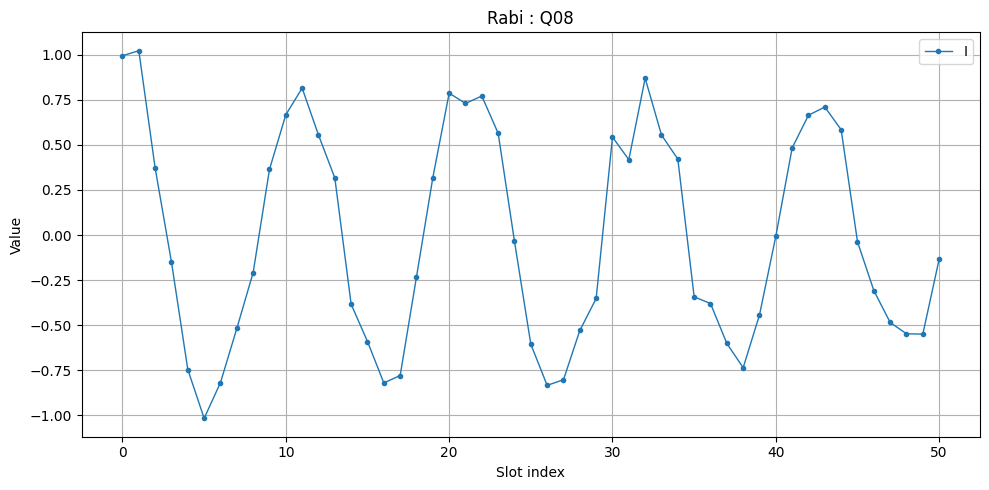

In [2]:
from src.plotters import plot_payload

p = payloads[0]
fig, ax = plot_payload(p, program=PROGRAM)